In [1]:
import scipy.io
import numpy as np
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mountain = scipy.io.loadmat('points_mountain.mat')
hyperbolas = scipy.io.loadmat('points_hyperbolas.mat')
cylinder = scipy.io.loadmat('points_cylinder.mat')

In [3]:
mountain = mountain['points_mountain']
hyperbolas = hyperbolas['points_hyperbolas']
cylinder = cylinder['points_cylinder']

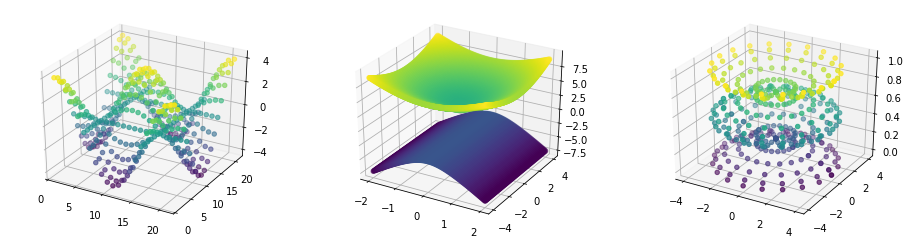

In [4]:
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(mountain[:,0], mountain[:,1], mountain[:,2], c=mountain[:,2])

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(hyperbolas[:,0], hyperbolas[:,1], hyperbolas[:,2], c = hyperbolas[:,2])

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(cylinder[:,0],cylinder[:,1],cylinder[:,2], c=cylinder[:,2])

plt.show()

In [5]:
n_neighbors = 30 #number of neighbors
n_components = 2 #dimension of the output
method = 'standard' #can change to 'hessian'

y_mountain = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                             eigen_solver='auto',
                                             method=method).fit_transform(mountain)
y_hyperbolas = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                             eigen_solver='auto',
                                             method=method).fit_transform(hyperbolas)
y_cylinder = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                             eigen_solver='auto',
                                             method=method).fit_transform(cylinder)

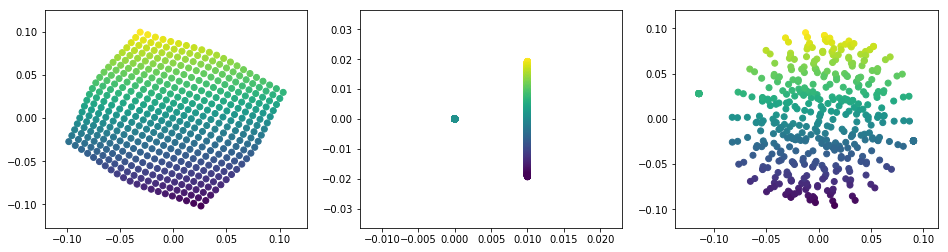

In [6]:
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(y_mountain[:,0], y_mountain[:,1], c=y_mountain[:,1])

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(y_hyperbolas[:,0], y_hyperbolas[:,1], c = y_hyperbolas[:,1])

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(y_cylinder[:,0],y_cylinder[:,1], c=y_cylinder[:,1])

plt.show()